<a href="https://colab.research.google.com/github/mariaaapetrovskaya/complingua/blob/main/%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%22vectors_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-03 18:43:04--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.01s   

2025-11-03 18:43:05 (7.02 MB/s) - ‘test.csv.1’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [2]:
import pandas as pd
df = pd.read_csv('test.csv')

3. Извлечь столбец с текстами (макс. балл == 1)

In [3]:
texts = df['text'].tolist()

4. Построить Bag-of-Words (макс. балл == 3)

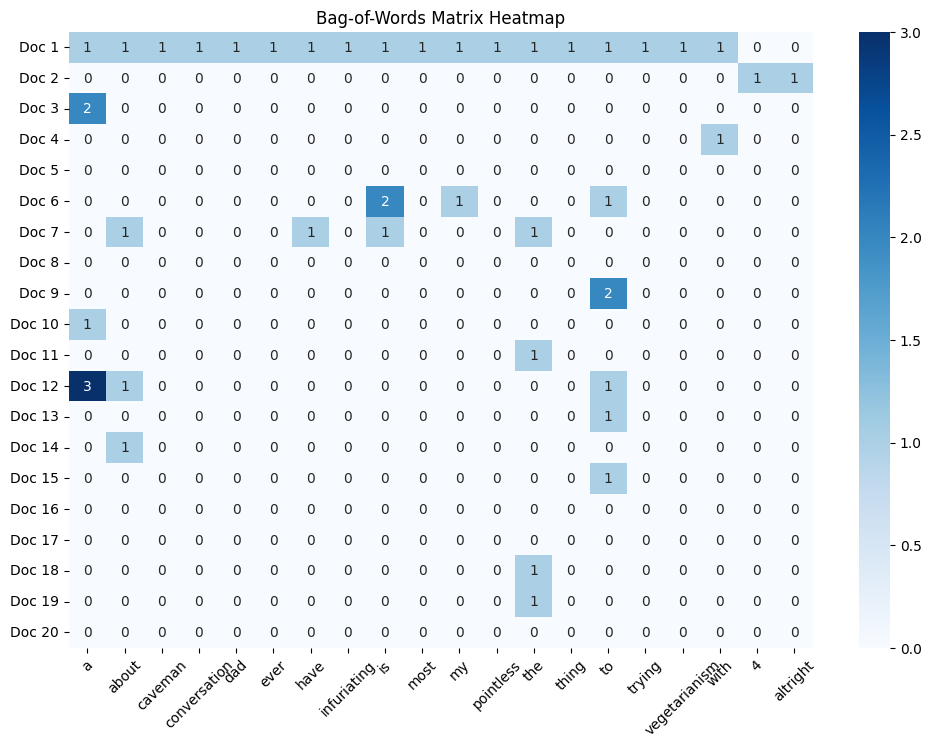

Самые частые слова:
     word  frequency
38   user        570
12    the        387
14     to        268
0       a        227
25     of        199
8      is        186
80    for        176
116    in        165
30    and        164
67      i        135


In [9]:
import re
from gensim import corpora
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    return tokens
tokenized_docs = [preprocess_text(text) for text in texts]
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors
dense_vectors = bow_to_dense(bow_corpus, dictionary)
word_freq = np.sum(dense_vectors, axis=0)
word_freq_df = pd.DataFrame({
    'word': [dictionary[i] for i in range(len(dictionary))],
    'frequency': word_freq
}).sort_values('frequency', ascending=False)
matrix_subset = np.array(dense_vectors[:20])[:, :20]
words_subset = [dictionary[i] for i in range(20)]
doc_names = [f"Doc {i+1}" for i in range(20)]

plt.figure(figsize=(12, 8))
sns.heatmap(matrix_subset,
            annot=True,
            fmt='d',
            xticklabels=words_subset,
            yticklabels=doc_names,
            cmap='Blues')
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()
print("Самые частые слова:")
print(word_freq_df.head(10))




5. Построить TF-IDF (макс. балл == 5)

In [13]:

from gensim.models import TfidfModel
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индкс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")
def analyze_tfidf_components(bow_corpus, dictionary):

    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq

    df_vector = np.sum(tf_matrix > 0, axis=0)
    N = len(bow_corpus)
    idf_vector = np.log(N / (df_vector + 1)) + 1
    tfidf_manual = tf_matrix * idf_vector

    return tf_matrix, df_vector, idf_vector, tfidf_manual


tf_matrix, df_vector, idf_vector, tfidf_manual = analyze_tfidf_components(bow_corpus, dictionary)
results = []
for word_id in range(len(dictionary)):
    word = dictionary[word_id]
    tf_example = tf_matrix[0, word_id]
    df = df_vector[word_id]
    idf = idf_vector[word_id]
    tfidf_example = tfidf_manual[0, word_id]

    results.append({
        'word': word,
        'tf_example_doc1': tf_example,
        'document_frequency': df,
        'idf': round(idf, 4),
        'tfidf_example_doc1': round(tfidf_example, 4)
    })
results_df = pd.DataFrame(results)
results_df.to_csv('tfidf_analysis.csv', index=False)


TF-IDF векторы (индкс_слова: tfidf_вес):
Документ 1: [('a', np.float64(0.078)), ('about', np.float64(0.163)), ('caveman', np.float64(0.35)), ('conversation', np.float64(0.35)), ('dad', np.float64(0.314)), ('ever', np.float64(0.257)), ('have', np.float64(0.149)), ('infuriating', np.float64(0.35)), ('is', np.float64(0.087)), ('most', np.float64(0.21)), ('my', np.float64(0.149)), ('pointless', np.float64(0.35)), ('the', np.float64(0.056)), ('thing', np.float64(0.236)), ('to', np.float64(0.069)), ('trying', np.float64(0.293)), ('vegetarianism', np.float64(0.226)), ('with', np.float64(0.132))]
Документ 2: [('4', np.float64(0.238)), ('altright', np.float64(0.281)), ('at', np.float64(0.162)), ('israel', np.float64(0.234)), ('latestnews', np.float64(0.369)), ('nativeamerican', np.float64(0.369)), ('newmexico', np.float64(0.369)), ('of', np.float64(0.086)), ('palestine', np.float64(0.256)), ('politics', np.float64(0.309)), ('protesting', np.float64(0.331)), ('rise', np.float64(0.309))]
Документ

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```